<a href="https://colab.research.google.com/github/rdewolf127/Tinker-Python/blob/master/NetworkX_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**NetworkX - Demo**

# NetworkX Resources

Demo Files - https://drive.google.com/drive/folders/1uuiA3q3xpf-n0xU6uUndkid5Fk32rwCL?usp=sharing

NetworkX - https://networkx.org/

NetowrkX Documentation - https://networkx.org/documentation/stable/reference/introduction.html

NetworkX Tutorial - https://networkx.org/documentation/stable/tutorial.html

NetworkX Gallery - https://networkx.org/documentation/stable/auto_examples/index.html

NetowrkX Guides -  https://networkx.org/nx-guides/

Visualizing Twitter Interactions with Network X - https://medium.com/future-vision/visualizing-twitter-interactions-with-networkx-a391da239af5

Analyzing Network Data in Python using NetworkX and DyNetworkX https://github.com/ideaslabut/sbp-brims-2021-networkx-tutorial

# Import Data/Install Packages

In [ ]:
# Import your drive

from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
# See what files are in your drive

!ls "/content/drive/My Drive/NetworkX Demo/" #replace "edata" with the name of a different folder.

In [ ]:
!pip install openpyxl --upgrade --pre # run this code block first because you have to restart runtime afterwards (if you wait, then you will have to run every other block again and it will be super annoying).

In [ ]:
#import packages

import numpy as np
import pandas as pd
import re
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
# Load data

parler_df = pd.read_excel("/content/drive/My Drive/NetworkX Demo/parler_data_demo.xlsx")
parler_df.head()


In [ ]:
# Get a list of the columns for ease-of-use

parler_df.columns

# Parler Co-Hashtag Network

# No Label Network

In [ ]:
#Co-Hashtag Parler Network with No Labels

def generate_tags_and_coincidences(data):
    tg = []
    coi = []
    tag_pattern = re.compile("#[\w\d]+")
    # loop through every message, skipping the header row
    for i in range(1, len(data['body'])):
        current_matches = tag_pattern.findall(data['body'][i])
        tg.extend(current_matches)
        coi.append(current_matches)
    tg = [item.lower() for item in tg]
    tg = list(set(tg))
    tg.sort()

    for i in range(len(coi)):
        for j in range(len(coi[i])):
            coi[i][j] = coi[i][j].lower()
    return tg, coi


def generate_edges(node_list, coincidences_list):
    edge_list = []
    for k in range(len(coincidences_list)):
        for j in range(1, len(coincidences_list[k])):
            for i in range(len(coincidences_list[k]) - 1):
                if nodes[coincidences_list[k][j]] != nodes[coincidences_list[k][i]]:
                    edge_list.append((nodes[coincidences_list[k][j]], nodes[coincidences_list[k][i]]))
    return edge_list


tg_coi = generate_tags_and_coincidences(parler_df)
tags = tg_coi[0]
coincidences = tg_coi[1]

# generate  nodes from list of hashtags

nodes = {tags[i].lower(): i for i in range(len(tags))}
#print(nodes)
#print(coincidences)
edges = generate_edges(nodes, coincidences)
#print(edges)

G = nx.Graph()
G.add_nodes_from(nodes.values())
G.add_edges_from(edges)
pos = nx.spring_layout(G, k=1.5 * 1 / np.sqrt(len(G.nodes())), iterations=20)
# make a reversed dictionary of the nodes for the labels
node_labels = {value: key for key, value in nodes.items()}

#Options for graph
options = {
    'node_size': 60,
    'alpha': 0.6,
    'width': 1,
    'pos': pos,
    
}

#Figure size and more options
plt.figure(figsize=(10, 10))
nx.draw(G, node_color='blue', edgecolors='black', edge_color='lightgrey', linewidths=0.3, verticalalignment='bottom', font_size=10, **options)

print(f"Number of Edges: {len(G.edges())}")
print(f"Number of Nodes: {len(G.nodes())}")

plt.show()

# Labeled Network

In [ ]:
#Co-Hashtag Parler Network with Labels

def generate_tags_and_coincidences(data):
    tg = []
    coi = []
    tag_pattern = re.compile("#[\w\d]+")
    # loop through every message, skipping the header row
    for i in range(1, len(data['body'])):
        current_matches = tag_pattern.findall(data['body'][i])
        tg.extend(current_matches)
        coi.append(current_matches)
    tg = [item.lower() for item in tg]
    tg = list(set(tg))
    tg.sort()

    for i in range(len(coi)):
        for j in range(len(coi[i])):
            coi[i][j] = coi[i][j].lower()
    return tg, coi


def generate_edges(node_list, coincidences_list):
    edge_list = []
    for k in range(len(coincidences_list)):
        for j in range(1, len(coincidences_list[k])):
            for i in range(len(coincidences_list[k]) - 1):
                if nodes[coincidences_list[k][j]] != nodes[coincidences_list[k][i]]:
                    edge_list.append((nodes[coincidences_list[k][j]], nodes[coincidences_list[k][i]]))
    return edge_list


tg_coi = generate_tags_and_coincidences(parler_df)
tags = tg_coi[0]
coincidences = tg_coi[1]

# generate  nodes from list of hashtags

nodes = {tags[i].lower(): i for i in range(len(tags))}
#print(nodes)
#print(coincidences)
edges = generate_edges(nodes, coincidences)
#print(edges)

G = nx.Graph()
G.add_nodes_from(nodes.values())
G.add_edges_from(edges)
pos = nx.spring_layout(G, k=1.5 * 1 / np.sqrt(len(G.nodes())), iterations=20)
# make a reversed dictionary of the nodes for the labels
node_labels = {value: key for key, value in nodes.items()}

#Options for Graph
options = {
    'node_size': 70,
    'alpha': 0.6,
    'width': 1,
    'pos': pos,
    'labels': node_labels
}

#Graph size and more options
plt.figure(figsize=(50, 50))
nx.draw(G, node_color='green', edgecolors='black', edge_color='lightgrey', linewidths=1, verticalalignment='bottom', font_size=10, **options)

print(f"Number of Edges: {len(G.edges())}")
print(f"Number of Nodes: {len(G.nodes())}")

plt.show()

# Community-Girvan Newman


# Girvan Newman - No Label

In [ ]:
#Co-Hashtag Girvan Newman Parler Newwork with No Labels

def generate_tags_and_coincidences(data):
    tg = []
    coi = []
    tag_pattern = re.compile("#[\w\d]+")
    # loop through every message, skipping the header row
    for i in range(1, len(data['body'])):
        current_matches = tag_pattern.findall(data['body'][i])
        tg.extend(current_matches)
        coi.append(current_matches)
    tg = [item.lower() for item in tg]
    tg = list(set(tg))
    tg.sort()

    for i in range(len(coi)):
        for j in range(len(coi[i])):
            coi[i][j] = coi[i][j].lower()
    return tg, coi


def generate_edges(node_list, coincidences_list):
    edge_list = []
    for k in range(len(coincidences_list)):
        for j in range(1, len(coincidences_list[k])):
            for i in range(len(coincidences_list[k]) - 1):
                if nodes[coincidences_list[k][j]] != nodes[coincidences_list[k][i]]:
                    edge_list.append((nodes[coincidences_list[k][j]], nodes[coincidences_list[k][i]]))
    return edge_list


tg_coi = generate_tags_and_coincidences(parler_df)
tags = tg_coi[0]
coincidences = tg_coi[1]

# generate  nodes from list of hashtags

nodes = {tags[i].lower(): i for i in range(len(tags))}
#print(nodes)
#print(coincidences)
edges = generate_edges(nodes, coincidences)
#print(edges)

G = nx.Graph()
G.add_nodes_from(nodes.values())
G.add_edges_from(edges)
pos = nx.spring_layout(G, k=1.5 * 1 / np.sqrt(len(G.nodes())), iterations=20)

# make a reversed dictionary of the nodes for the labels
node_labels = {value: key for key, value in nodes.items()}

#Options for graph
options = {
    'node_size': 60,
    'width': 1,
    'pos': pos,

}
communities = nx.algorithms.community.centrality.girvan_newman(G)
node_groups = []
for com in next(communities):
    node_groups.append(list(com))
#print(node_groups)
plt.figure(figsize=(7, 7))

#Colors for different communitites
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    elif node in node_groups[1]:
        color_map.append('#665191')
    elif node in node_groups[2]:
        color_map.append('#d45087')
    elif node in node_groups[3]:
        color_map.append('#f95d6a')
    elif node in node_groups[4]:
        color_map.append('#ff7c43')
    else: 
        color_map.append('#ffa600')   

#More options for graph
nx.draw(G, node_color=color_map, edgecolors='black', edge_color='lightgrey', linewidths=1, verticalalignment='bottom', font_size=10, **options)

print(f"Number of Edges: {len(G.edges())}")
print(f"Number of Nodes: {len(G.nodes())}")
print(f"Number of Communities: {len(node_groups)}")

plt.show()


# Girvan Newman - Labeled


In [ ]:
#Co-Hashtag Girvan Newman Parler Newwork with No Labels

def generate_tags_and_coincidences(data):
    tg = []
    coi = []
    tag_pattern = re.compile("#[\w\d]+")
    # loop through every message, skipping the header row
    for i in range(1, len(data['body'])):
        current_matches = tag_pattern.findall(data['body'][i])
        tg.extend(current_matches)
        coi.append(current_matches)
    tg = [item.lower() for item in tg]
    tg = list(set(tg))
    tg.sort()

    for i in range(len(coi)):
        for j in range(len(coi[i])):
            coi[i][j] = coi[i][j].lower()
    return tg, coi


def generate_edges(node_list, coincidences_list):
    edge_list = []
    for k in range(len(coincidences_list)):
        for j in range(1, len(coincidences_list[k])):
            for i in range(len(coincidences_list[k]) - 1):
                if nodes[coincidences_list[k][j]] != nodes[coincidences_list[k][i]]:
                    edge_list.append((nodes[coincidences_list[k][j]], nodes[coincidences_list[k][i]]))
    return edge_list


tg_coi = generate_tags_and_coincidences(parler_df)
tags = tg_coi[0]
coincidences = tg_coi[1]

# generate  nodes from list of hashtags

nodes = {tags[i].lower(): i for i in range(len(tags))}
#print(nodes)
#print(coincidences)
edges = generate_edges(nodes, coincidences)
#print(edges)

G = nx.Graph()
G.add_nodes_from(nodes.values())
G.add_edges_from(edges)
pos = nx.spring_layout(G, k=1.5 * 1 / np.sqrt(len(G.nodes())), iterations=20)

# make a reversed dictionary of the nodes for the labels
node_labels = {value: key for key, value in nodes.items()}

#Options for graph
options = {
    'node_size': 60,
    'width': 1,
    'pos': pos,
    'labels': node_labels

}
communities = nx.algorithms.community.centrality.girvan_newman(G)
node_groups = []
for com in next(communities):
    node_groups.append(list(com))
#print(node_groups)
plt.figure(figsize=(50, 50))

#Colors for different communitites
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('green')
    elif node in node_groups[1]:
        color_map.append('#665191')
    elif node in node_groups[2]:
        color_map.append('#d45087')
    elif node in node_groups[3]:
        color_map.append('#f95d6a')
    elif node in node_groups[4]:
        color_map.append('#ff7c43')
    else: 
        color_map.append('#ffa600')   

#More graph options
nx.draw(G, node_color=color_map, edge_color='lightgrey', linewidths=1, verticalalignment='bottom', font_size=10, **options)

print(f"Edges: {len(G.edges())}")
print(f"Nodes: {len(G.nodes())}")
print(f"Communities: {len(node_groups)}")

plt.show()


# Sized by Coincidences Network - No Label

In [ ]:
#Parler Network Sized by Coincidences - No Label

def generate_tags_and_coincidences(data):
    tg = []
    coi = []
    tag_pattern = re.compile("#[\w\d]+")
    # loop through every message, skipping the header row
    for i in range(1, len(data['body'])):
        current_matches = tag_pattern.findall(data['body'][i])
        tg.extend(current_matches)
        coi.append(current_matches)
    tg = [item.lower() for item in tg]
    tg = list(set(tg))
    tg.sort()

    for i in range(len(coi)):
        for j in range(len(coi[i])):
            coi[i][j] = coi[i][j].lower()
    return tg, coi


def generate_edges(node_list, coincidences_list):
    edge_list = []
    for k in range(len(coincidences_list)):
        for j in range(1, len(coincidences_list[k])):
            for i in range(len(coincidences_list[k]) - 1):
                if nodes[coincidences_list[k][j]] != nodes[coincidences_list[k][i]]:
                    edge_list.append((nodes[coincidences_list[k][j]], nodes[coincidences_list[k][i]]))
    return edge_list


def centrality_color_and_scale(graph):
    # Scale and color nodes based on centrality
    color_scale = ['#FFA600', '#ff6e54', '#dd5182', '#955196']
    base_node_size = 10000
    scaled_size = [centrality * base_node_size for node, centrality in nx.degree_centrality(graph).items()]
    scaled_color = []
    for node in scaled_size:
        max_score = max(scaled_size)
        for i in range(len(color_scale)):
            if node <= ((i + 1) * (max_score / len(color_scale))):
                scaled_color.append(color_scale[i])
                break
    return scaled_size, scaled_color


tg_coi = generate_tags_and_coincidences(parler_df)
tags = tg_coi[0]
coincidences = tg_coi[1]

# generate  nodes from list of hashtags

nodes = {tags[i].lower(): i for i in range(len(tags))}
#print(nodes)
#print(coincidences)
edges = generate_edges(nodes, coincidences)
#print(edges)

G = nx.Graph()
G.add_nodes_from(nodes.values())
G.add_edges_from(edges)
pos = nx.spring_layout(G, k=1.5 * 1 / np.sqrt(len(G.nodes())), iterations=20)

# make a reversed dictionary of the nodes for the labels
node_labels = {value: key for key, value in nodes.items()}
sizes_and_colors = centrality_color_and_scale(G)
options = {
    'node_size': sizes_and_colors[0],
    'width': 1,
    'pos': pos,
    'node_color': sizes_and_colors[1]
}
plt.figure(figsize=(10, 10))
nx.draw(G, edgecolors='black', edge_color='lightgrey', linewidths=1, verticalalignment='bottom', font_size=10, **options)

print(f"Number of Edges: {len(G.edges())}")
print(f"Number of Nodes: {len(G.nodes())}")
plt.show()


# Sized by Coincidences Network - Labeled

Edges: 2235
Nodes: 144


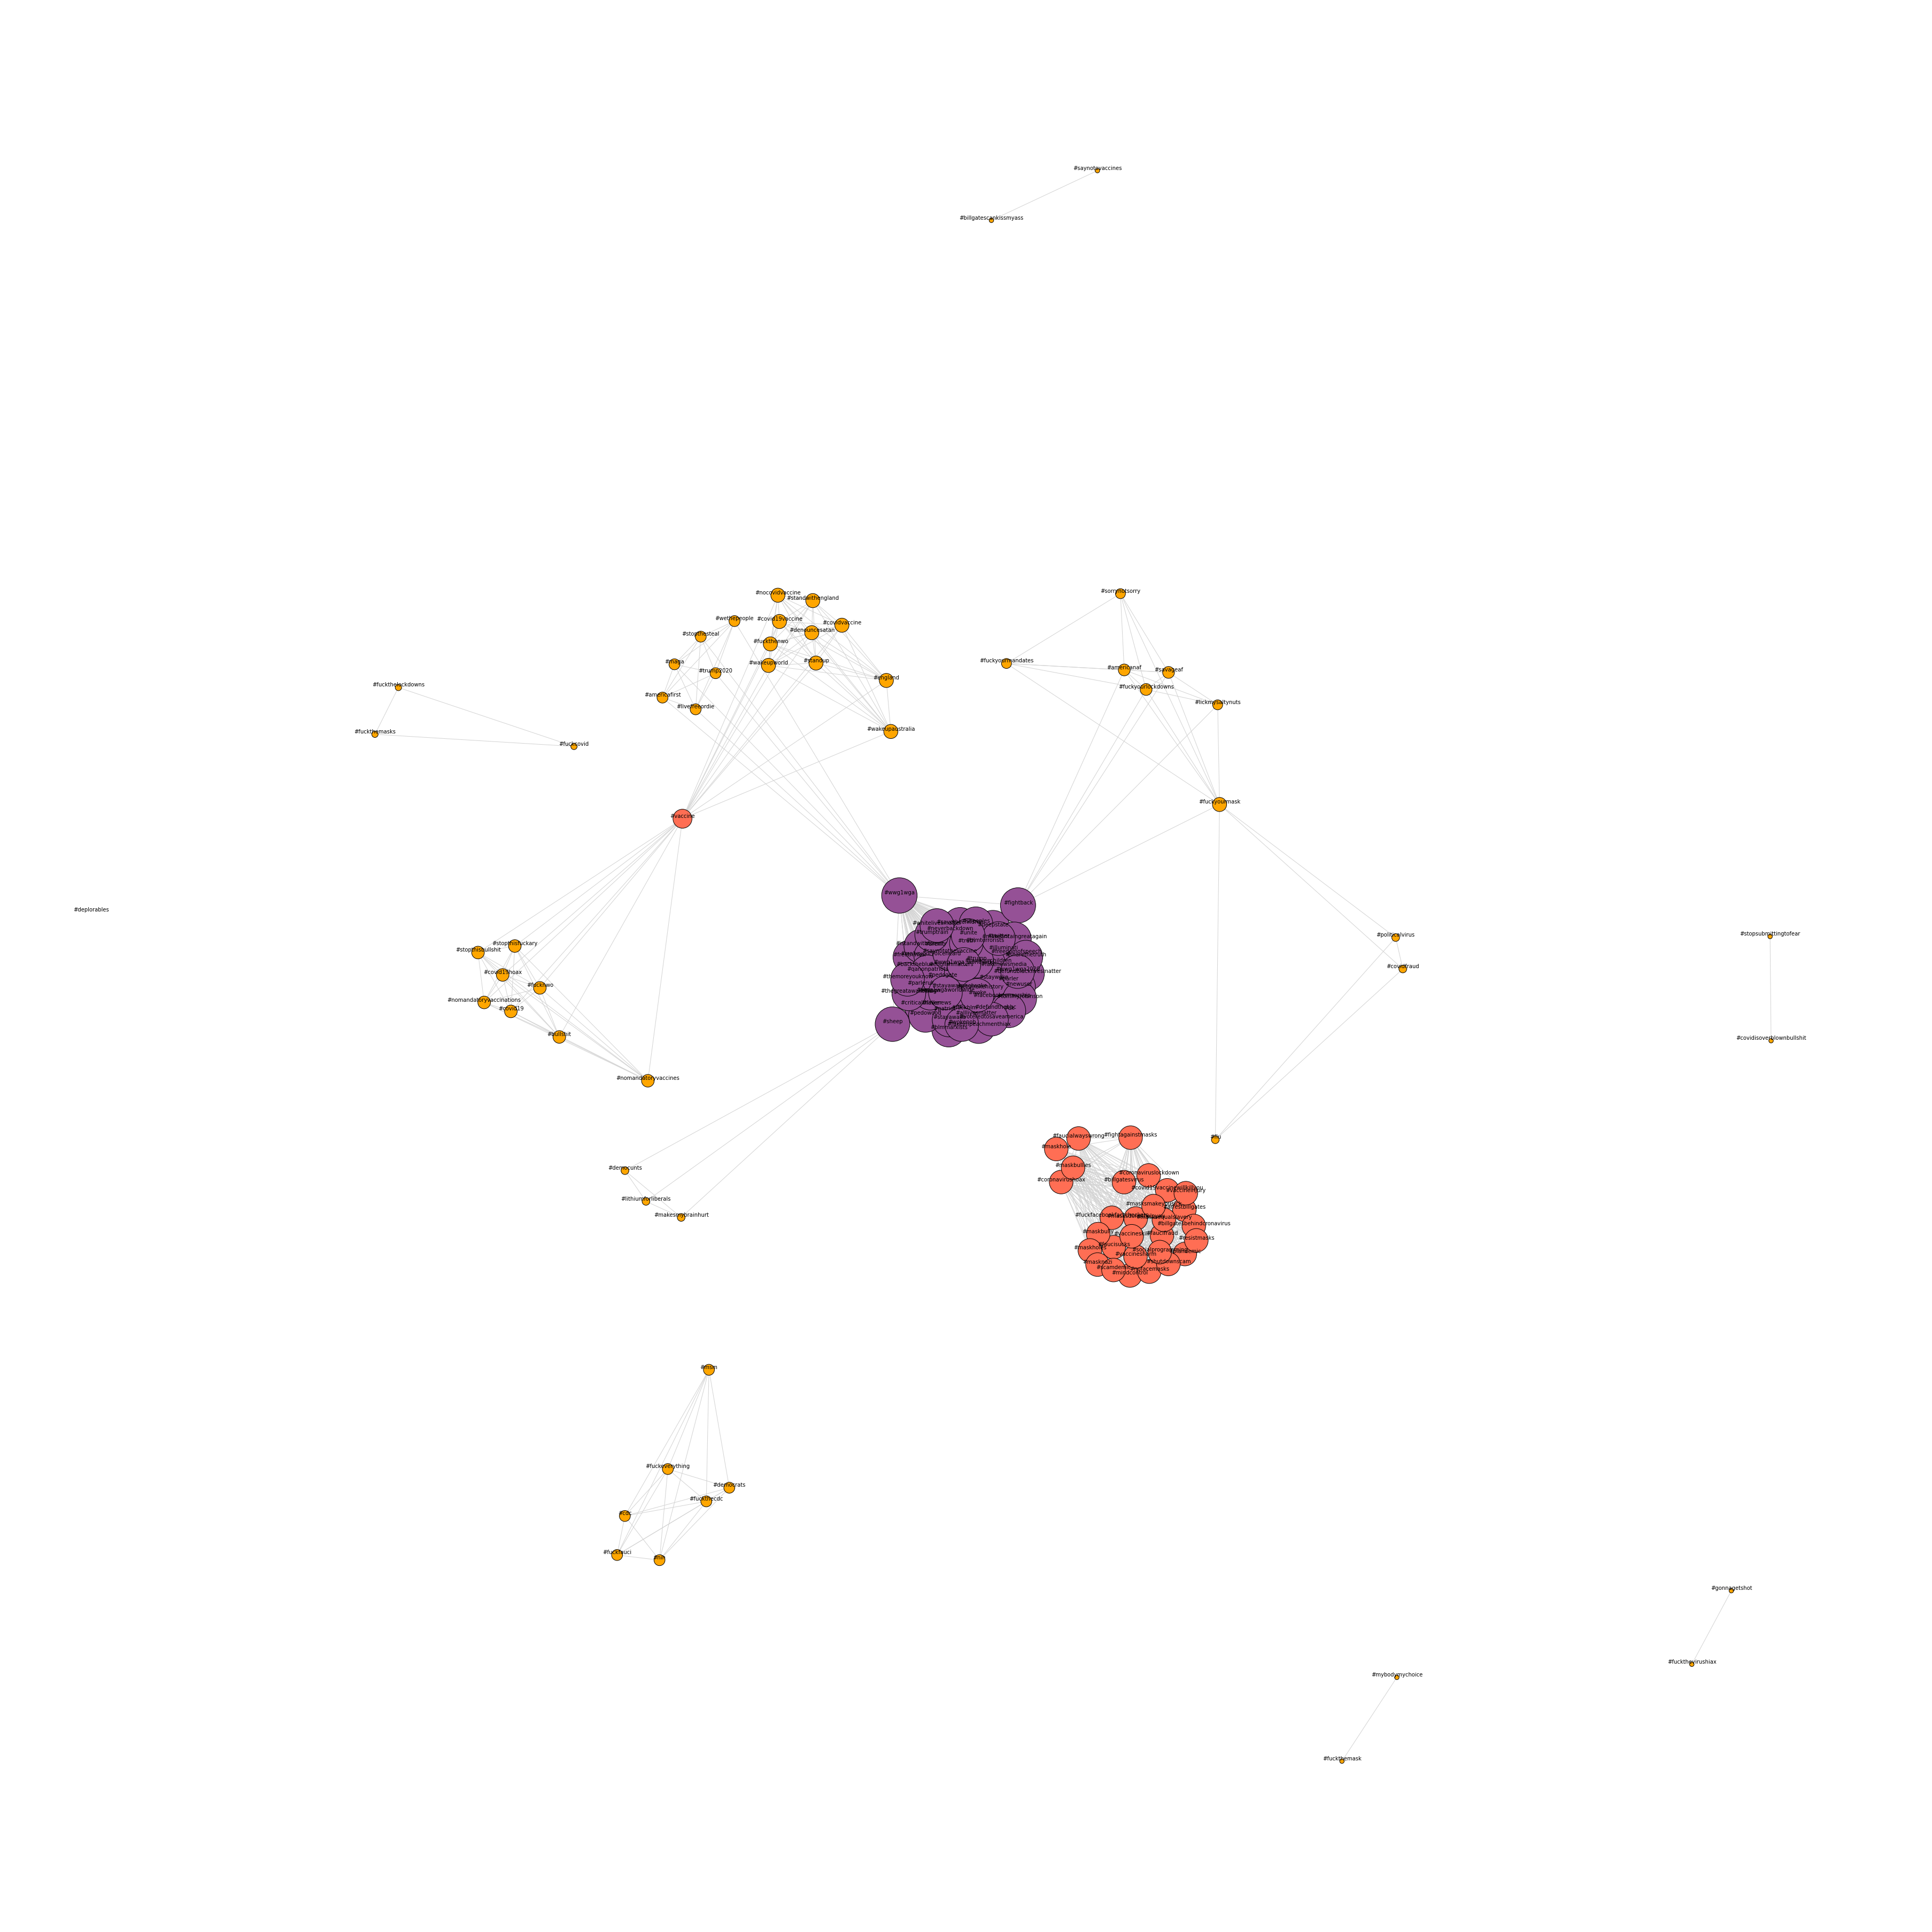

In [ ]:
#Parler Network Sized by Coincidences - Labeled

def generate_tags_and_coincidences(data):
    tg = []
    coi = []
    tag_pattern = re.compile("#[\w\d]+")
    # loop through every message, skipping the header row
    for i in range(1, len(data['body'])):
        current_matches = tag_pattern.findall(data['body'][i])
        tg.extend(current_matches)
        coi.append(current_matches)
    tg = [item.lower() for item in tg]
    tg = list(set(tg))
    tg.sort()

    for i in range(len(coi)):
        for j in range(len(coi[i])):
            coi[i][j] = coi[i][j].lower()
    return tg, coi


def generate_edges(node_list, coincidences_list):
    edge_list = []
    for k in range(len(coincidences_list)):
        for j in range(1, len(coincidences_list[k])):
            for i in range(len(coincidences_list[k]) - 1):
                if nodes[coincidences_list[k][j]] != nodes[coincidences_list[k][i]]:
                    edge_list.append((nodes[coincidences_list[k][j]], nodes[coincidences_list[k][i]]))
    return edge_list


def centrality_color_and_scale(graph):
    # Scale and color nodes based on centrality
    color_scale = ['#FFA600', '#ff6e54', '#dd5182', '#955196']
    base_node_size = 10000
    scaled_size = [centrality * base_node_size for node, centrality in nx.degree_centrality(graph).items()]
    scaled_color = []
    for node in scaled_size:
        max_score = max(scaled_size)
        for i in range(len(color_scale)):
            if node <= ((i + 1) * (max_score / len(color_scale))):
                scaled_color.append(color_scale[i])
                break
    return scaled_size, scaled_color


tg_coi = generate_tags_and_coincidences(parler_df)
tags = tg_coi[0]
coincidences = tg_coi[1]

# generate  nodes from list of hashtags

nodes = {tags[i].lower(): i for i in range(len(tags))}
#print(nodes)
#print(coincidences)
edges = generate_edges(nodes, coincidences)
#print(edges)

G = nx.Graph()
G.add_nodes_from(nodes.values())
G.add_edges_from(edges)
pos = nx.spring_layout(G, k=1.5 * 1 / np.sqrt(len(G.nodes())), iterations=20)

# make a reversed dictionary of the nodes for the labels
node_labels = {value: key for key, value in nodes.items()}
sizes_and_colors = centrality_color_and_scale(G)
options = {
    'node_size': sizes_and_colors[0],
    'width': 1,
    'pos': pos,
    'labels': node_labels,
    'node_color': sizes_and_colors[1]
}
plt.figure(figsize=(50, 50))
nx.draw(G, edgecolors='black', edge_color='lightgrey', linewidths=1, verticalalignment='bottom', font_size=10, **options)

print(f"Edges: {len(G.edges())}")
print(f"Nodes: {len(G.nodes())}")
plt.show()


# Girvan Newman - Sized by Coincidences (No Label)

Number of Edges: 2235
Number of Nodes: 144
Number of Communities: 144


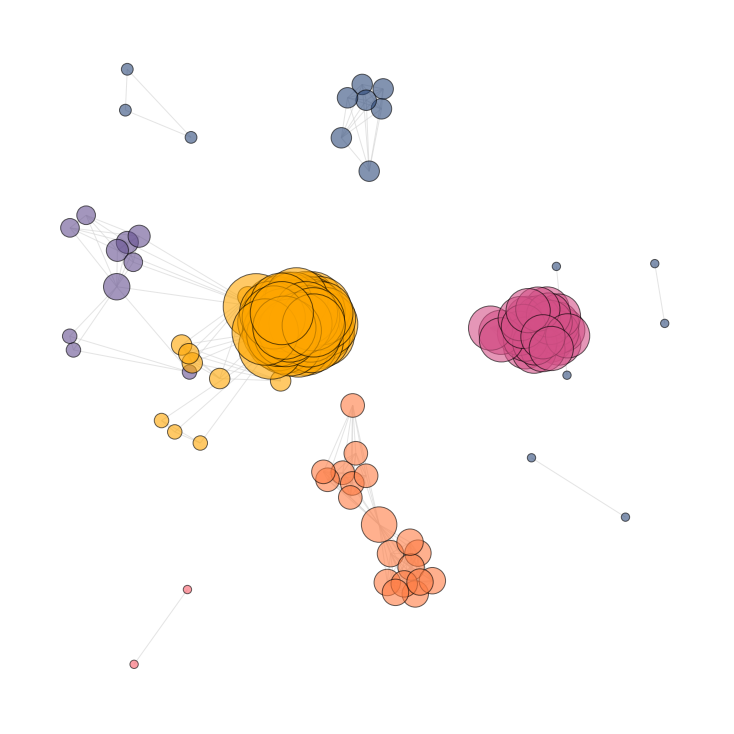

In [ ]:
#Parler Girvan Newman Network Sized by Coincidences - No Label

def generate_tags_and_coincidences(data):
    tg = []
    coi = []
    tag_pattern = re.compile("#[\w\d]+")
    # loop through every message, skipping the header row
    for i in range(1, len(data['body'])):
        current_matches = tag_pattern.findall(data['body'][i])
        tg.extend(current_matches)
        coi.append(current_matches)
    tg = [item.lower() for item in tg]
    tg = list(set(tg))
    tg.sort()

    for i in range(len(coi)):
        for j in range(len(coi[i])):
            coi[i][j] = coi[i][j].lower()
    return tg, coi


def generate_edges(node_list, coincidences_list):
    edge_list = []
    for k in range(len(coincidences_list)):
        for j in range(1, len(coincidences_list[k])):
            for i in range(len(coincidences_list[k]) - 1):
                if nodes[coincidences_list[k][j]] != nodes[coincidences_list[k][i]]:
                    edge_list.append((nodes[coincidences_list[k][j]], nodes[coincidences_list[k][i]]))
    return edge_list


tg_coi = generate_tags_and_coincidences(parler_df)
tags = tg_coi[0]
coincidences = tg_coi[1]

# generate  nodes from list of hashtags

nodes = {tags[i].lower(): i for i in range(len(tags))}
#print(nodes)
#print(coincidences)
edges = generate_edges(nodes, coincidences)
#print(edges)

G = nx.Graph()
G.add_nodes_from(nodes.values())
G.add_edges_from(edges)
pos = nx.spring_layout(G, k=1.5 * 1 / np.sqrt(len(G.nodes())), iterations=20)

# make a reversed dictionary of the nodes for the labels
node_labels = {value: key for key, value in nodes.items()}
sizes_and_colors = centrality_color_and_scale(G)
options = {
    'node_size': sizes_and_colors[0],
    'alpha': 0.6,
    'width': 1,
    'pos': pos,

}
communities = nx.algorithms.community.centrality.girvan_newman(G)
node_groups = []
for com in next(communities):
    node_groups.append(list(com))
#print(node_groups)
plt.figure(figsize=(10, 10))

color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('#ffa600')
    elif node in node_groups[1]:
        color_map.append('#665191')
    elif node in node_groups[2]:
        color_map.append('#d45087')
    elif node in node_groups[3]:
        color_map.append('#f95d6a')
    elif node in node_groups[4]:
        color_map.append('#ff7c43')
    else: 
        color_map.append('#2f4b7c')   

nx.draw(G, node_color=color_map, edgecolors='black', edge_color='lightgrey', linewidths=1, verticalalignment='bottom', font_size=10, **options)

print(f"Number of Edges: {len(G.edges())}")
print(f"Number of Nodes: {len(G.nodes())}")
print(f"Number of Communities: {len(G.nodes())}")

plt.show()


#Girvan Newman - Sized by Coincidences (Labeled)

Number of Edges: 2235
Number of Nodes: 144
Number of Communities: 11


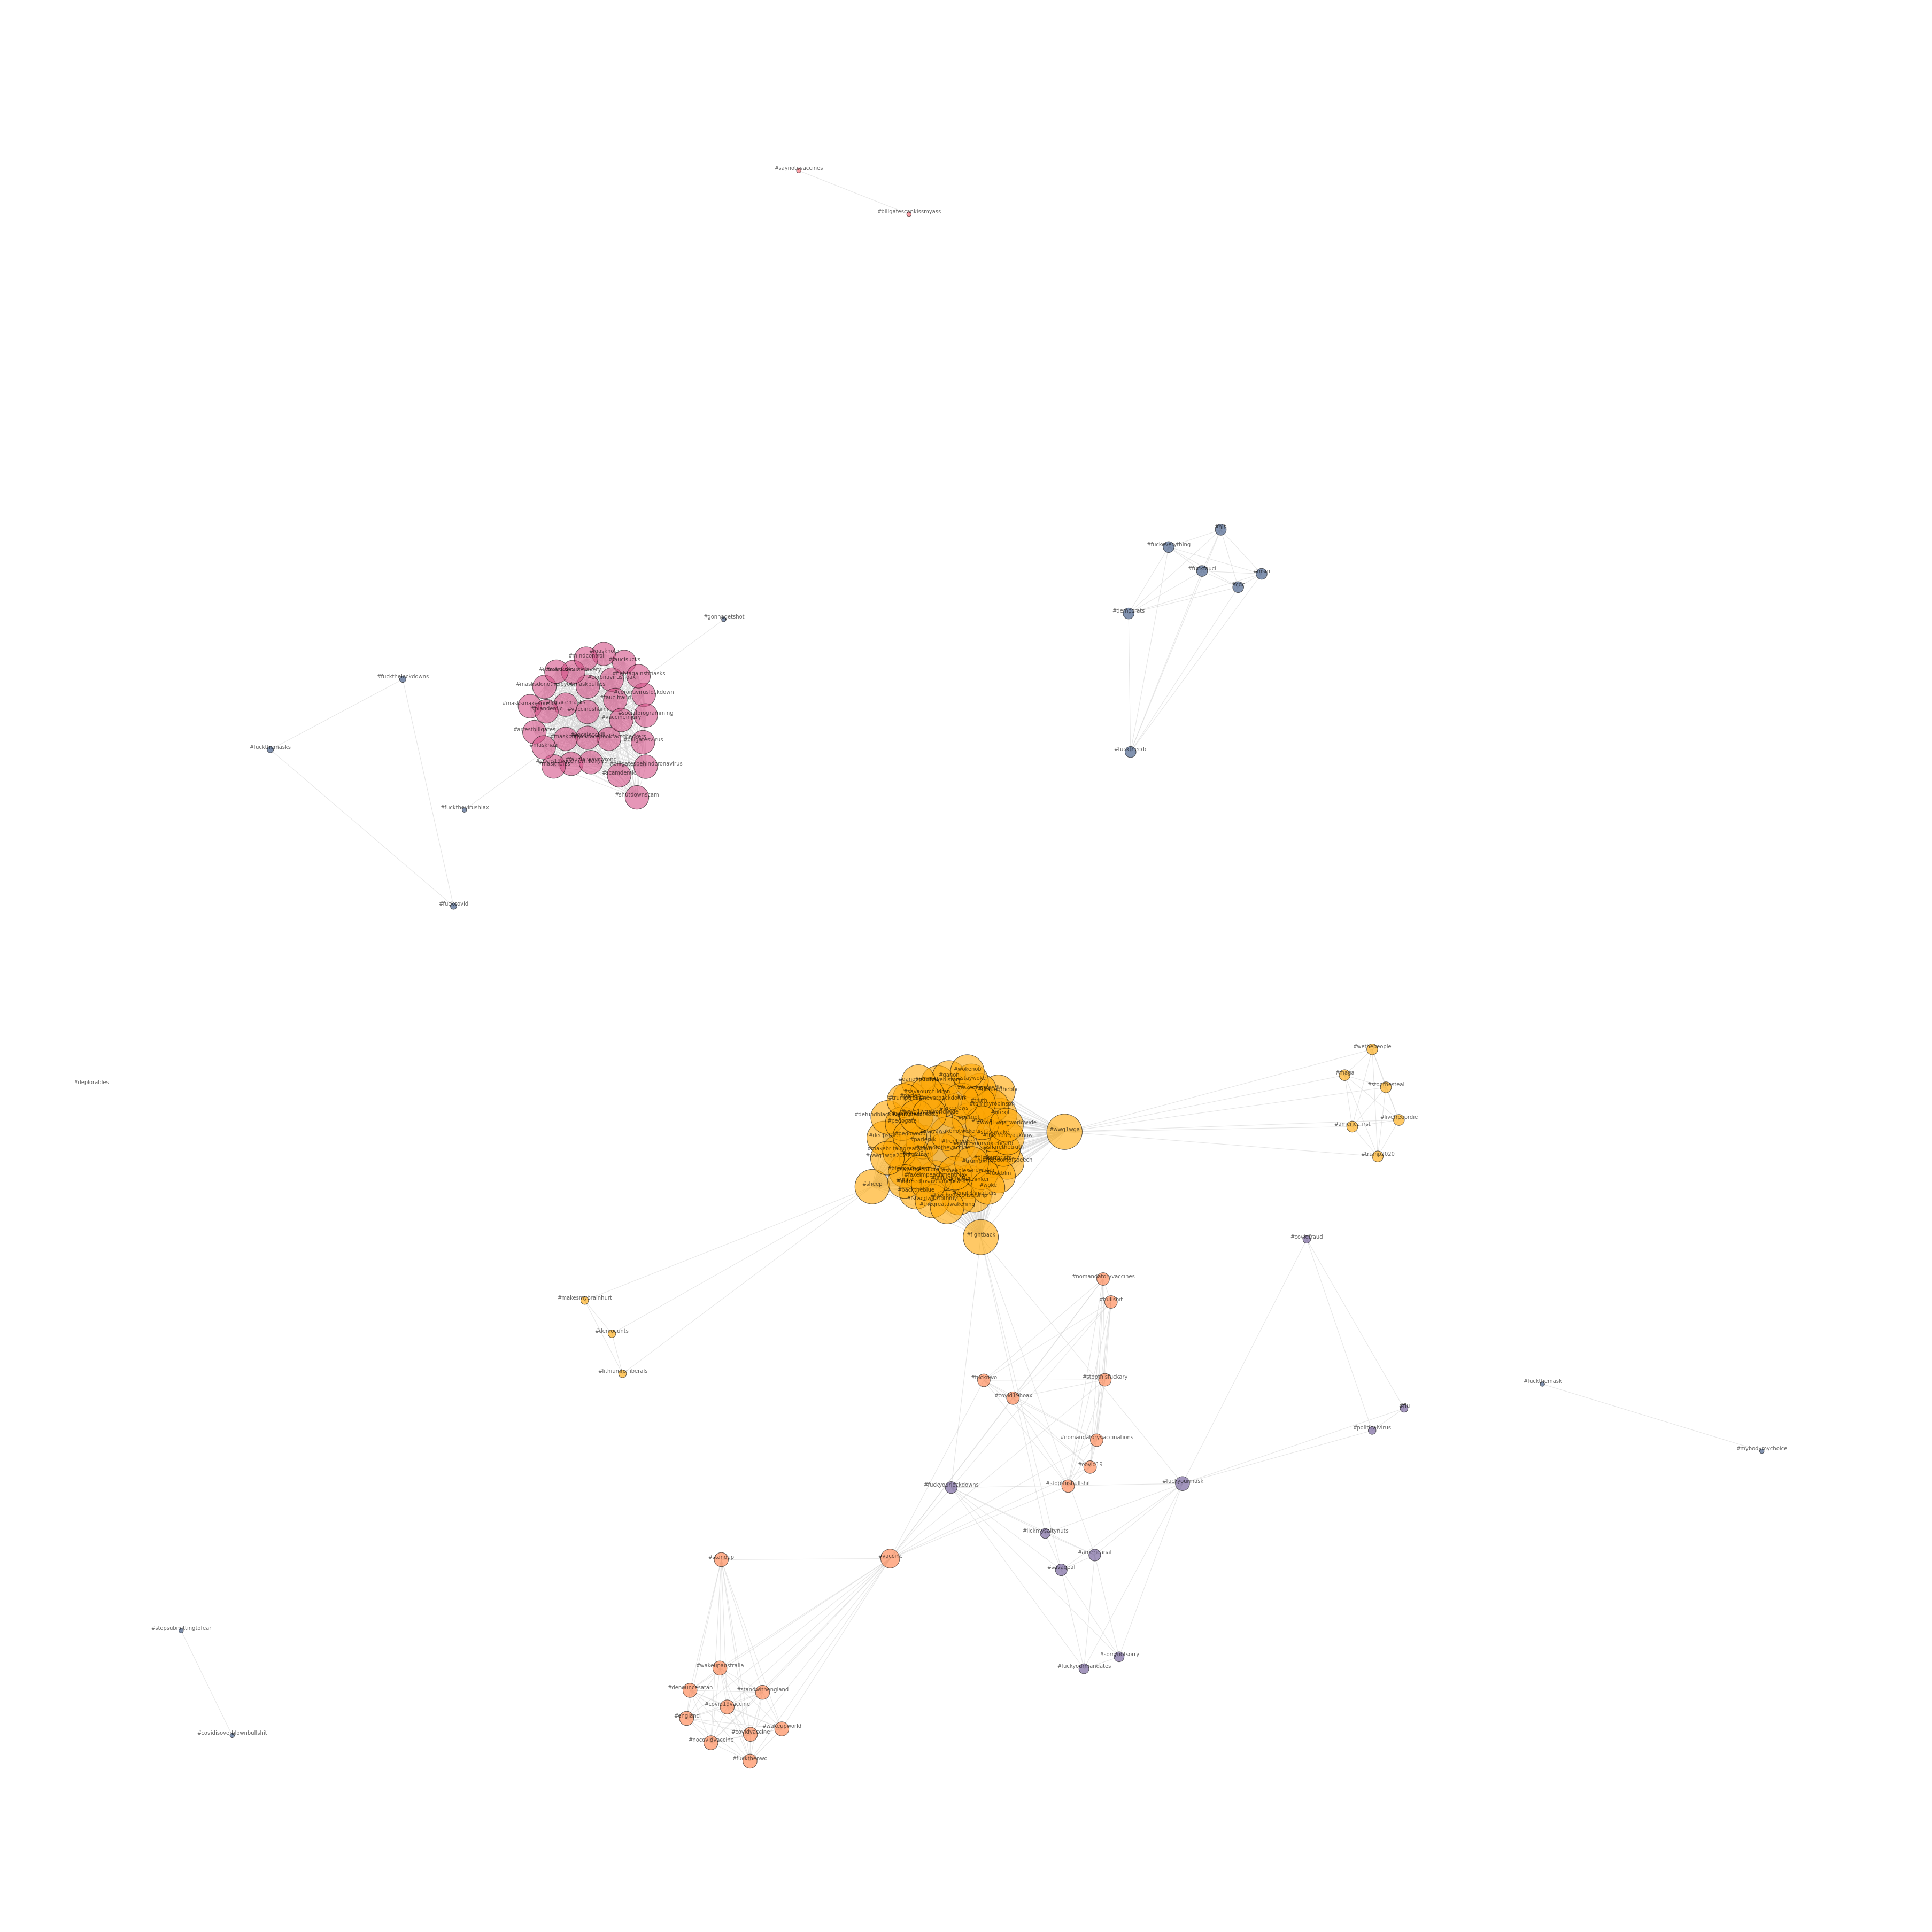

In [ ]:
#Parler Girvan Newman Network Sized by Coincidences - With Labels


def generate_tags_and_coincidences(data):
    tg = []
    coi = []
    tag_pattern = re.compile("#[\w\d]+")
    # loop through every message, skipping the header row
    for i in range(1, len(data['body'])):
        current_matches = tag_pattern.findall(data['body'][i])
        tg.extend(current_matches)
        coi.append(current_matches)
    tg = [item.lower() for item in tg]
    tg = list(set(tg))
    tg.sort()

    for i in range(len(coi)):
        for j in range(len(coi[i])):
            coi[i][j] = coi[i][j].lower()
    return tg, coi


def generate_edges(node_list, coincidences_list):
    edge_list = []
    for k in range(len(coincidences_list)):
        for j in range(1, len(coincidences_list[k])):
            for i in range(len(coincidences_list[k]) - 1):
                if nodes[coincidences_list[k][j]] != nodes[coincidences_list[k][i]]:
                    edge_list.append((nodes[coincidences_list[k][j]], nodes[coincidences_list[k][i]]))
    return edge_list


tg_coi = generate_tags_and_coincidences(parler_df)
tags = tg_coi[0]
coincidences = tg_coi[1]

# generate  nodes from list of hashtags

nodes = {tags[i].lower(): i for i in range(len(tags))}
#print(nodes)
#print(coincidences)
edges = generate_edges(nodes, coincidences)
#print(edges)

G = nx.Graph()
G.add_nodes_from(nodes.values())
G.add_edges_from(edges)
pos = nx.spring_layout(G, k=1.5 * 1 / np.sqrt(len(G.nodes())), iterations=20)

# make a reversed dictionary of the nodes for the labels
node_labels = {value: key for key, value in nodes.items()}
sizes_and_colors = centrality_color_and_scale(G)
options = {
    'node_size': sizes_and_colors[0],
    'alpha': 0.6,
    'width': 1,
    'pos': pos,
    'labels': node_labels

}
communities = nx.algorithms.community.centrality.girvan_newman(G)
node_groups = []
for com in next(communities):
    node_groups.append(list(com))
#print(node_groups)
plt.figure(figsize=(50, 50))

color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('#ffa600')
    elif node in node_groups[1]:
        color_map.append('#665191')
    elif node in node_groups[2]:
        color_map.append('#d45087')
    elif node in node_groups[3]:
        color_map.append('#f95d6a')
    elif node in node_groups[4]:
        color_map.append('#ff7c43')
    else: 
        color_map.append('#2f4b7c')   

nx.draw(G, node_color=color_map, edgecolors='black', edge_color='lightgrey', linewidths=1, verticalalignment='bottom', font_size=10, **options)

print(f"Number of Edges: {len(G.edges())}")
print(f"Number of Nodes: {len(G.nodes())}")
print(f"Number of Communities: {len(node_groups)}")
plt.show()

# Twitter Mention Network

In [ ]:
# Loading data

twitter_df = pd.read_excel("/content/drive/My Drive/NetworkX Demo/twitter_data_demo.xlsx")
twitter_df.head()

,id,source_id,created_at,geo_source,truncated,text,lang,user,retweet_count,favorite_count,...,place,text_toxicity,Unnamed: 23,text_severe_toxicity,text_obscene,text_threat,text_insult,text_identity_attack,text_sexual_explicit,text_sentiment
0,1.222331e+18,12,2020-01-29 01:28:46,None,0,@and_kell @AmerAcadPeds So sorry. I hope he ...,en,939539413,0,0,...,None,0.895778,0.895778,0.000138,0.907325,0.002241,0.185397,0.001971,0.018824,0.0
1,1.228550e+18,12,2020-02-15 05:21:43,None,0,@TheSGEM My eyes documented the evidence. Take...,en,1008272773,0,0,...,None,0.985436,0.985436,0.002509,0.883594,0.023393,0.569191,0.005458,0.914189,0.0
2,1.232218e+18,12,2020-02-25 08:16:18,None,0,@eugenegu @realDonaldTrump What about #LymeDis...,en,784889415206182912,0,1,...,None,0.992756,0.992756,0.001347,0.982355,0.007830,0.924979,0.015583,0.023413,0.0
3,1.234185e+18,12,2020-03-01 18:31:35,None,0,@jebbaOk @landa_west Fuck your vaccine...,en,2521245553,0,1,...,None,0.997000,0.997000,0.008333,0.987801,0.042819,0.973516,0.028837,0.185130,0.0
4,1.235432e+18,12,2020-03-05 05:07:05,None,0,@realDonaldTrump we know you’ve researched the...,en,1643107626,0,0,...,None,0.593506,0.593506,0.000172,0.611276,0.001959,0.179979,0.004846,0.026276,0.0


Number of Edges: 115
Number of Nodes: 151


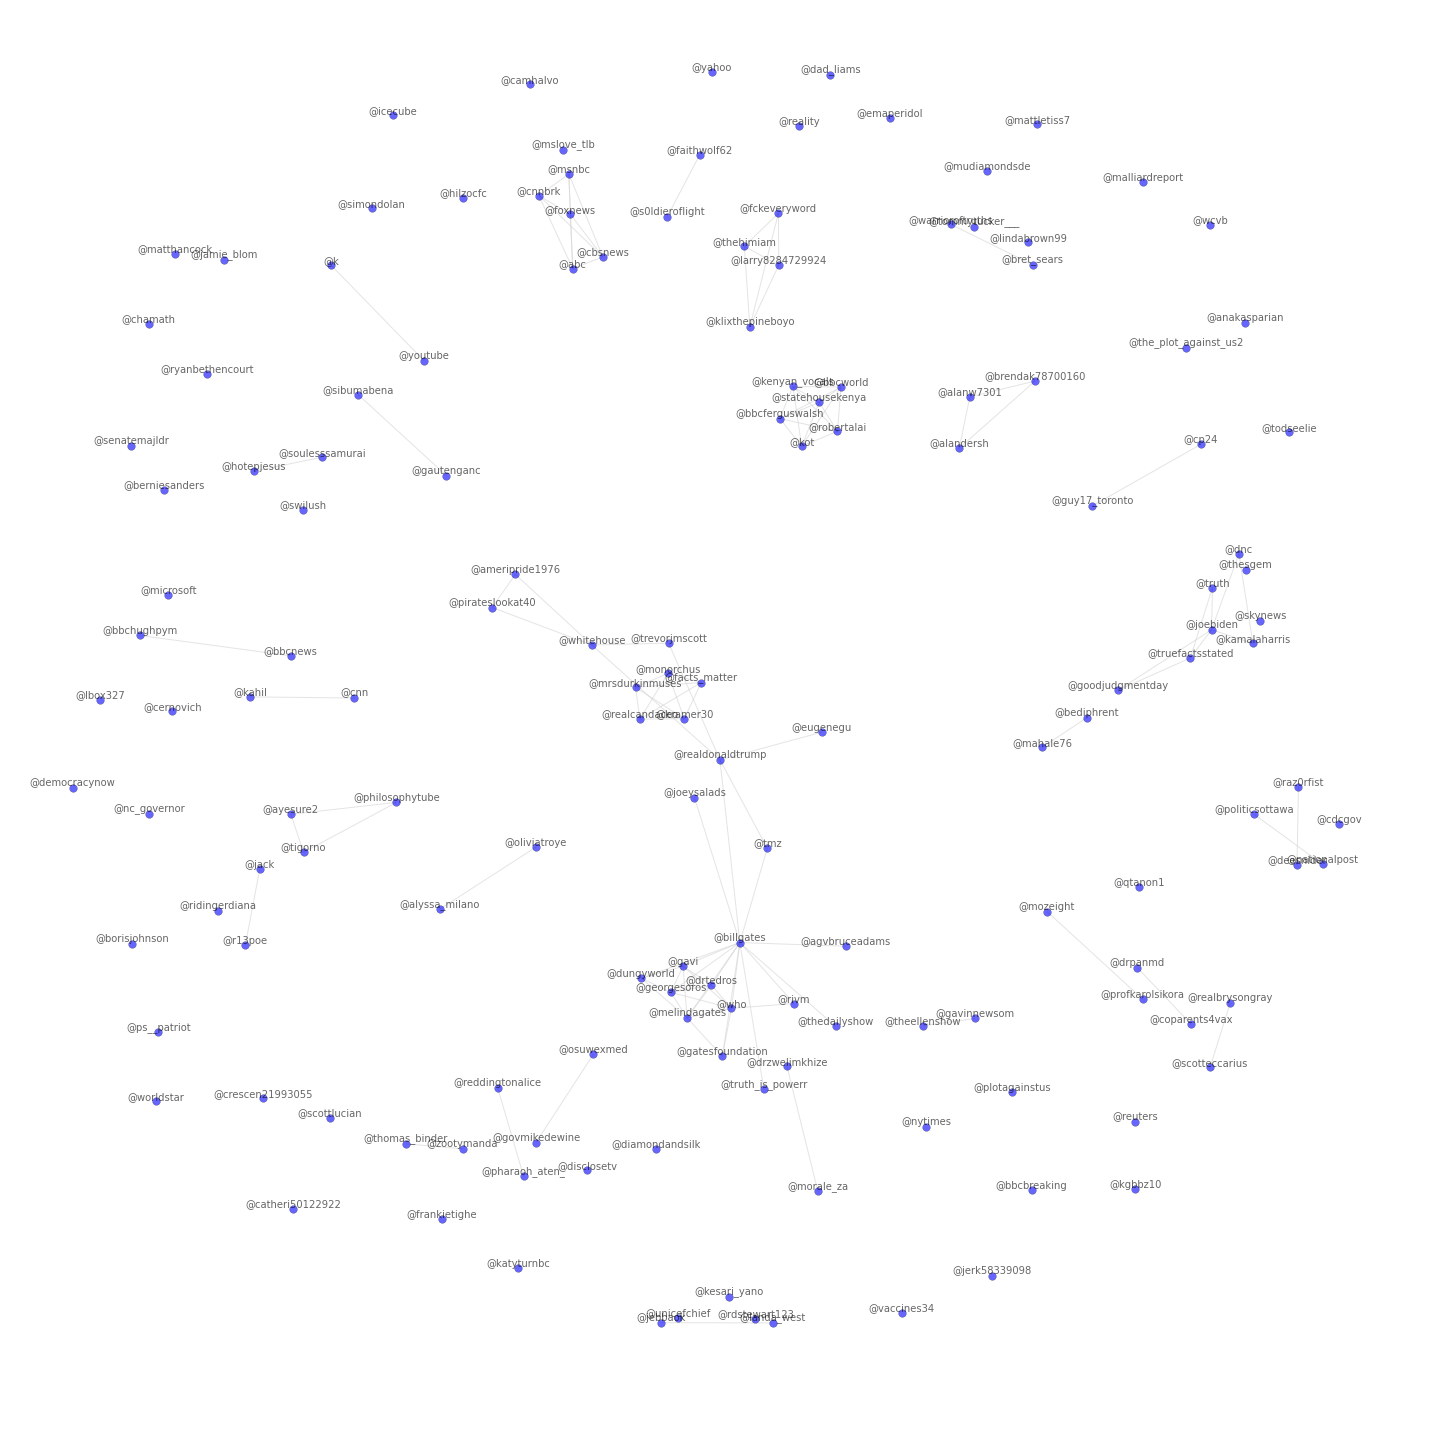

In [ ]:
#Co-Hashtag Parler Network with No Labels

def generate_tags_and_coincidences(data):
    tg = []
    coi = []
    tag_pattern = re.compile("@[\w\d]+")
    # loop through every message, skipping the header row
    for i in range(1, len(data['text'])):
        current_matches = tag_pattern.findall(data['text'][i])
        tg.extend(current_matches)
        coi.append(current_matches)
    tg = [item.lower() for item in tg]
    tg = list(set(tg))
    tg.sort()

    for i in range(len(coi)):
        for j in range(len(coi[i])):
            coi[i][j] = coi[i][j].lower()
    return tg, coi


def generate_edges(node_list, coincidences_list):
    edge_list = []
    for k in range(len(coincidences_list)):
        for j in range(1, len(coincidences_list[k])):
            for i in range(len(coincidences_list[k]) - 1):
                if nodes[coincidences_list[k][j]] != nodes[coincidences_list[k][i]]:
                    edge_list.append((nodes[coincidences_list[k][j]], nodes[coincidences_list[k][i]]))
    return edge_list


tg_coi = generate_tags_and_coincidences(twitter_df)
tags = tg_coi[0]
coincidences = tg_coi[1]

# generate  nodes from list of hashtags

nodes = {tags[i].lower(): i for i in range(len(tags))}
#print(nodes)
#print(coincidences)
edges = generate_edges(nodes, coincidences)
#print(edges)

G = nx.Graph()
G.add_nodes_from(nodes.values())
G.add_edges_from(edges)
pos = nx.spring_layout(G, k=1.5 * 1 / np.sqrt(len(G.nodes())), iterations=20)
# make a reversed dictionary of the nodes for the labels
node_labels = {value: key for key, value in nodes.items()}

#Options for graph
options = {
    'node_size': 60,
    'alpha': 0.6,
    'width': 1,
    'pos': pos,
    'labels': node_labels
    
}

#Figure size and more options
plt.figure(figsize=(20, 20))
nx.draw(G, node_color='blue', edgecolors='black', edge_color='lightgrey', linewidths=0.3, verticalalignment='bottom', font_size=10, **options)

print(f"Number of Edges: {len(G.edges())}")
print(f"Number of Nodes: {len(G.nodes())}")

plt.show()